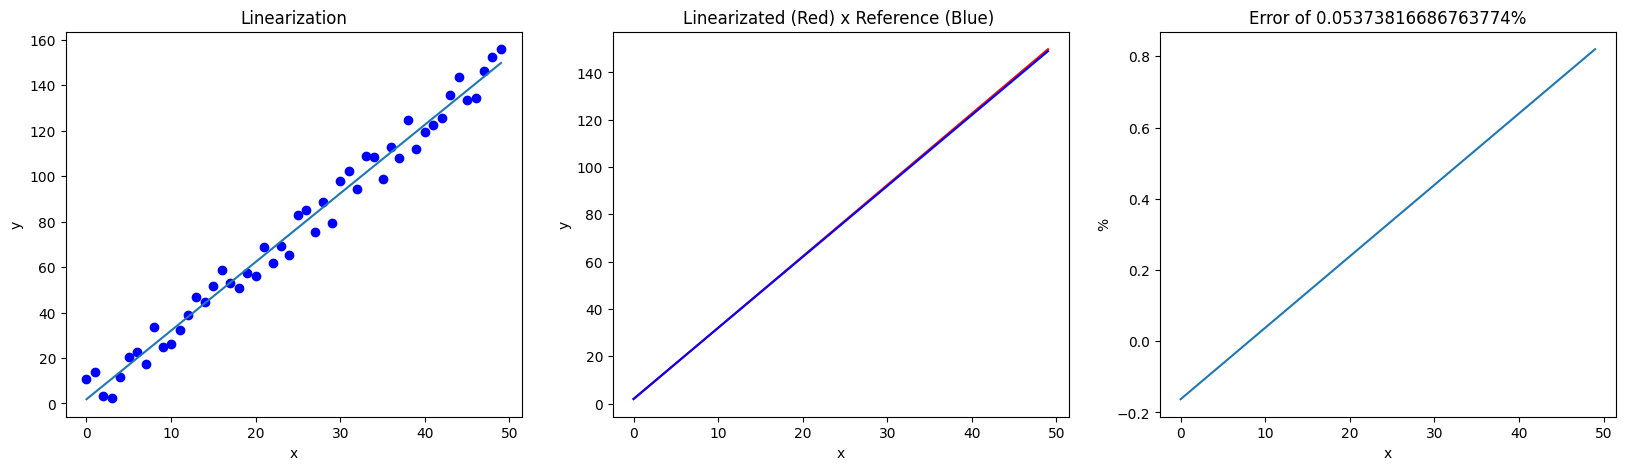

In [29]:
#Linearization
#One Shot Example

import numpy as np
import random

#Libs Just to Display
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from linearization import Linearization

def Example(AngularCoeficient, LinearCoeficient, Elements, Random):
    x = []
    y = []
    z = []
    randoms = []
    for i in range(Elements):
        x.append(i)
        y.append((i*AngularCoeficient + LinearCoeficient))
        z.append((i*AngularCoeficient + LinearCoeficient))
        if(Random != 0):
            randoms.append(random.uniform(-Random, Random))
            z[i] = z[i] + randoms[i]

    lnzt = Linearization(x, z)
    coeficients = lnzt.Linearization()

    w = []
    d = []
    p = []
    for i in range(Elements):
        w.append(i * coeficients["angular"] + coeficients["linear"])
        d.append(w[i] - y[i])
        if(y[i]):
            p.append(d[i] * 100 / y[i])
    percent = lnzt._SumOfArray(p) / Elements

    f, ax = plt.subplots(ncols = 3, figsize = (20,5))
    ax[0].plot(x, z, marker='o', linestyle='None', color='b')
    ax[0].plot(x, w)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    ax[0].set_title("Linearization")

    ax[1].plot(x, w, color="r")
    ax[1].plot(x, y, color="b")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("y")
    ax[1].set_title("Linearizated (Red) x Reference (Blue) ")

    ax[2].plot(x, d)
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("%")
    ax[2].set_title("Error of " + str(percent) + "%")

if __name__ == '__main__':
    AngularCoeficient = 3
    LinearCoeficient = 2
    Elements = 50
    Random = 9.5
    Example(AngularCoeficient, LinearCoeficient, Elements, Random)



In [23]:
#Linearization
#One Shot Example

import numpy as np
import random

#Libs Just to Display
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from linearization import Linearization

def One_Shot(AngularCoeficient, LinearCoeficient, Elements, Random):
    x = []
    y = []
    z = []
    randoms = []
    for i in range(Elements):
        x.append(i)
        y.append((i*AngularCoeficient + LinearCoeficient))
        z.append((i*AngularCoeficient + LinearCoeficient))
        if(Random != 0):
            randoms.append(random.uniform(-Random, Random))
            z[i] = z[i] + randoms[i]

    lnzt = Linearization(x, z)
    coeficients = lnzt.Linearization()

    w = []
    d = []
    p = []
    for i in range(Elements):
        w.append(i * coeficients["angular"] + coeficients["linear"])
        d.append(w[i] - y[i])
        if(y[i]):
            p.append(d[i] * 100 / y[i])
    percent = lnzt._SumOfArray(p) / Elements

    f, ax = plt.subplots(ncols = 3, figsize = (20,5))
    ax[0].plot(x, z, marker='o', linestyle='None', color='b')
    ax[0].plot(x, w)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    ax[0].set_title("Linearization")

    ax[1].plot(x, w, color="r")
    ax[1].plot(x, y, color="b")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("y")
    ax[1].set_title("Linearizated (Red) x Reference (Blue) ")

    ax[2].plot(x, d)
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("%")
    ax[2].set_title("Error of " + str(percent) + "%")

    #random.randint(0, numberOfDoors - 1)

interact(One_Shot,
        AngularCoeficient = widgets.FloatSlider(value = 1, min = -10, max = 10, step = 0.1),
        LinearCoeficient = widgets.FloatSlider(value = 0, min = -10, max = 10, step = 0.1),
        Elements = widgets.IntSlider(value = 10, min = 2, max = 100, step = 1),
        Random = widgets.FloatSlider(value = 1, min = 0, max = 10, step = 0.1)
        )

interactive(children=(FloatSlider(value=1.0, description='AngularCoeficient', max=10.0, min=-10.0), FloatSlide…

<function __main__.One_Shot(AngularCoeficient, LinearCoeficient, Elements, Random)>

In [7]:
#Linearization of an Exponential
#One Shot Example

import numpy as np
import random

#Libs Just to Display
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from linearization import Linearization

import numpy as np


def One_Shot(Amplitude, Expoent, VerticalShift, Base, Elements, Random):
    x = []
    y = []
    z = []
    w = []
    d = []
    randoms = []
    for i in range(Elements):
        x.append(i)
        y.append((Amplitude * (Base ** (Expoent * i))))
        z.append(y[i])
        if(Random != 0):
            randoms.append(random.uniform(-Random, Random))
            z[i] = z[i] + randoms[i]

    lnzt = Linearization(x, z)

    base = lnzt._GetExponentialBase(x,z)
    amplitude = lnzt._GetExponentialAmplitude(x, y, base)

    for i in range(Elements):
        w.append((amplitude * (base **  i)))
        d.append(w[i] - y[i])

    f, ax = plt.subplots(ncols = 3, figsize = (20,5))
    ax[0].plot(x, z, marker='o', linestyle='None', color='b')
    ax[0].plot(x, y)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    ax[0].set_title("Exponential and Noise")

    ax[1].plot(x, w, color="r")
    ax[1].plot(x, y, color="b")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("y")
    ax[1].set_title("Linearizated (Red) x Reference (Blue) ")

    ax[2].plot(x, d)
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("y")
    ax[2].set_title("Diference")

    #random.randint(0, numberOfDoors - 1)

interact(One_Shot,
        Amplitude = widgets.FloatSlider(value = 1, min = -10, max = 10, step = 0.1),
        Expoent = widgets.FloatSlider(value = 1, min = -10, max = 10, step = 0.1),
        VerticalShift = widgets.FloatSlider(value = 0, min = -10, max = 10, step = 0.1),
        Base = widgets.FloatSlider(value = 1.1, min = 1, max = 10, step = 0.1),
        Elements = widgets.IntSlider(value = 50, min = 2, max = 100, step = 1),
        Random = widgets.FloatSlider(value = 1, min = 0, max = 10, step = 0.1)
        )

interactive(children=(FloatSlider(value=1.0, description='Amplitude', max=10.0, min=-10.0), FloatSlider(value=…

<function __main__.One_Shot(Amplitude, Expoent, VerticalShift, Base, Elements, Random)>